# Dask arrays

Let's explore Dask arrays!

In [ ]:
import numpy as np
import dask.array as da

Let's create a random dask array, do some operation and visualize it:

In [ ]:
x = da.random.random((2000, 2000), chunks=(500, 500))
x

In [ ]:
x = da.random.random((8000, 8000))
x

In [ ]:
y = x.mean()

In [ ]:
y.visualize() #optimize_graph=True, color='order',
            #cmap='autumn', node_attr={'penwidth': '2'})

Let's increase the size of the array and compute the operation.

In [ ]:
%%time
N = 20000
x = da.random.random((N, N))
y = x.mean()
y.compute()

Let's compare the results with NumPy:

In [12]:
%%time
N = 20000
rng = np.random.default_rng()
x = rng.random((N, N))
x.mean()

CPU times: user 2.11 s, sys: 715 ms, total: 2.82 s
Wall time: 2.82 s


0.49999230800226363

<mark>**Question**</mark>: Try the two cells above with `N = 200`. Which one is faster, the numpy version or the dask one?

***

Let's consider now the operation `x @ x`. <mark>**Question**</mark>: Could you explain the results of the timings?

In [13]:
%%time
N = 6000
x = rng.random((N, N))
y = x @ x

CPU times: user 569 ms, sys: 98.4 ms, total: 668 ms
Wall time: 173 ms


In [16]:
N = 6000
x = da.random.random((N, N))
y = x @ x

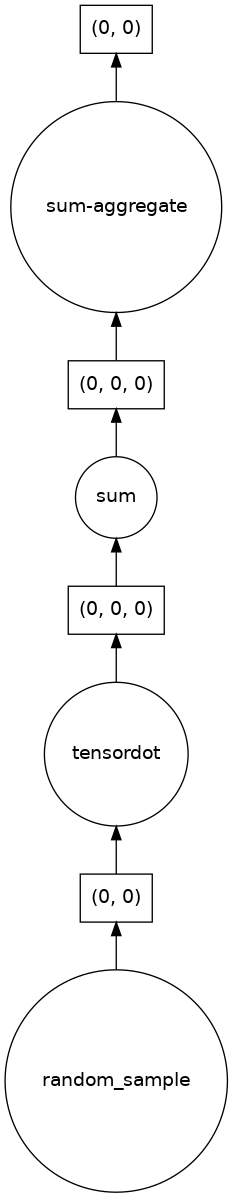

In [17]:
y.visualize(rankdir='LR')

In [ ]:
%%time
y.compute().shape